In [22]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [24]:
# account = pd.read_csv('../data/raw/account_services.csv')
# billing = pd.read_csv('../data/raw/billing_records.csv')
# churn_label = pd.read_csv('../data/raw/churn_labels.csv')
# customer = pd.read_csv('../data/raw/customer_info.csv')
# ticket = pd.read_csv('../data/raw/support_tickets.csv')
# data = pd.read_csv('../data/raw/usage_data.csv')

Intial Data Exploration

Merge datasets

In [25]:
# # Merge datasets on 'customer_id'
# merged_df = customer.merge(account, on='customer_id', how='left') \
#                       .merge(billing, on='customer_id', how='left') \
#                       .merge(churn_label, on='customer_id', how='left') \
#                       .merge(ticket, on='customer_id', how='left') \
#                       .merge(data, on='customer_id', how='left')

# # Display the merged dataset
# merged_df.head()

In [26]:
# missing = merged_df.isna().sum() / len(merged_df) * 100
# missing_df = pd.DataFrame({'column': missing.index, 'missing_percentage': missing.values}).round(2)
# missing_df = missing_df[missing_df['missing_percentage'] > 0].sort_values(by='missing_percentage', ascending=False).reset_index(drop=True)
# missing_df

In [27]:
# # Count of unique values for categorical variables
# print("\nUnique Values for Categorical Variables:")
# categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
# for col in categorical_columns:
#     print(f"{col}: {merged_df[col].nunique()} unique values")
#     if merged_df[col].nunique() < 10:  # Only show value counts for low-cardinality variables
#         print(merged_df[col].value_counts())
#         print()

Lets investigate these missing columns

In [28]:
# # Visualize missing values in the merged DataFrame
# import missingno as msno
# msno.matrix(merged_df)

In [29]:
# ### 2.3.1 Distribution of Numerical Variables

# # Create histograms for numerical variables
# numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
# num_cols = len(numerical_columns)

# # Determine grid size
# if num_cols <= 3:
#     nrows, ncols = 1, num_cols
# else:
#     nrows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
#     ncols = min(3, num_cols)

# plt.figure(figsize=(ncols*5, nrows*4))

# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(nrows, ncols, i)
#     sns.histplot(merged_df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()

# plt.suptitle('Distribution of Numerical Variables', y=1.02, fontsize=16)
# plt.tight_layout()
# plt.show()

# ### 2.3.2 Distribution of Categorical Variables

# # Create bar plots for categorical variables
# if len(categorical_columns) > 0:
#     num_cats = len(categorical_columns)

#     # Determine grid size
#     if num_cats <= 3:
#         nrows, ncols = 1, num_cats
#     else:
#         nrows = (num_cats // 3) + (1 if num_cats % 3 != 0 else 0)
#         ncols = min(3, num_cats)

#     plt.figure(figsize=(ncols*5, nrows*4))

#     for i, col in enumerate(categorical_columns, 1):
#         plt.subplot(nrows, ncols, i)
#         value_counts = merged_df[col].value_counts().sort_values(ascending=False)

#         # Limit number of categories shown if there are too many
#         if len(value_counts) > 10:
#             value_counts = value_counts.head(10)
#             plt.title(f'Top 10 Categories in {col}')
#         else:
#             plt.title(f'Categories in {col}')

#         sns.barplot(x=value_counts.index, y=value_counts.values)
#         plt.xticks(rotation=45, ha='right')
#         plt.ylabel('Count')
#         plt.tight_layout()

#     plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)
#     plt.tight_layout()
#     plt.show()

In [30]:
# # Create histograms for numerical variables
# numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
# num_cols = len(numerical_columns)

In [31]:
# ### 2.3.3 Correlation Analysis

# # Create correlation heatmap for numerical variables
# if len(numerical_columns) > 1:
#     plt.figure(figsize=(10, 8))
#     correlation_matrix = merged_df[numerical_columns].corr()
#     mask = np.triu(correlation_matrix)
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
#     plt.title('Correlation Matrix of Numerical Variables')
#     plt.tight_layout()
#     plt.show()

#     # Identify highly correlated variables
#     high_corr_threshold = 0.7
#     high_corr_vars = set()

#     for i in range(len(correlation_matrix.columns)):
#         for j in range(i):
#             if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
#                 high_corr_vars.add(f"{correlation_matrix.columns[i]} & {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

#     if high_corr_vars:
#         print("Highly correlated variables (|r| > 0.7):")
#         for pair in high_corr_vars:
#             print(f"  {pair}")
#     else:
#         print("No highly correlated variables found (|r| > 0.7)")

In [32]:
# ## 2.4 Data Quality Assessment

# ### 2.4.1 Missing Values Analysis

# # Check for missing values
# missing_values = merged_df.isnull().sum()
# missing_percentage = (missing_values / len(merged_df)) * 100

# missing_data = pd.concat([missing_values, missing_percentage], axis=1,
#                          keys=['Missing Values', 'Percentage (%)'])

# print("Missing Values Analysis:")
# display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# # Visualize missing values
# if missing_values.sum() > 0:
#     plt.figure(figsize=(12, 6))
#     cols_with_missing = missing_data[missing_data['Missing Values'] > 0].index.tolist()

#     if len(cols_with_missing) > 0:
#         if len(cols_with_missing) <= 30:  # Only visualize if not too many columns
#             sns.heatmap(merged_df[cols_with_missing].isnull(), cmap='viridis', yticklabels=False,
#                         cbar_kws={'label': 'Missing Values'})
#             plt.title('Missing Value Heatmap')
#             plt.tight_layout()
#             plt.show()

#         # Visualize the percentage of missing values by column
#         plt.figure(figsize=(12, 6))
#         missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='bar')
#         plt.title('Percentage of Missing Values by Column')
#         plt.xlabel('Columns')
#         plt.ylabel('Percentage (%)')
#         plt.xticks(rotation=45, ha='right')
#         plt.tight_layout()
#         plt.show()
#     else:
#         print("No columns with missing values to visualize.")
# else:
#     print("No missing values in the dataset. Great!")

# ### 2.4.2 Outliers Detection

# # Function to detect outliers in numerical columns
# def detect_outliers(merged_df, column):
#     q1 = merged_df[column].quantile(0.25)
#     q3 = merged_df[column].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)][column]
#     return outliers, lower_bound, upper_bound

# # Detect and visualize outliers in numerical columns
# outlier_summary = {}
# for col in numerical_columns:
#     outliers, lower_bound, upper_bound = detect_outliers(merged_df, col)
#     outlier_percentage = (len(outliers) / len(merged_df)) * 100
#     outlier_summary[col] = {
#         'count': len(outliers),
#         'percentage': outlier_percentage,
#         'lower_bound': lower_bound,
#         'upper_bound': upper_bound
#     }

# print("Outlier Analysis:")
# for col, stats in outlier_summary.items():
#     print(f"{col}: {stats['count']} outliers ({stats['percentage']:.2f}% of data)")
#     print(f"  Range: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")

# # Visualize outliers with box plots for columns with significant outliers
# cols_with_outliers = [col for col, stats in outlier_summary.items() if stats['percentage'] > 1]

# if cols_with_outliers:
#     # Determine grid size
#     if len(cols_with_outliers) <= 3:
#         nrows, ncols = 1, len(cols_with_outliers)
#     else:
#         nrows = (len(cols_with_outliers) // 3) + (1 if len(cols_with_outliers) % 3 != 0 else 0)
#         ncols = min(3, len(cols_with_outliers))

#     plt.figure(figsize=(ncols*5, nrows*4))

#     for i, col in enumerate(cols_with_outliers, 1):
#         plt.subplot(nrows, ncols, i)
#         sns.boxplot(y=merged_df[col])
#         plt.title(f'Boxplot of {col}')
#         plt.tight_layout()

#     plt.suptitle('Outlier Analysis with Box Plots', y=1.02, fontsize=16)
#     plt.tight_layout()
#     plt.show()
# else:
#     print("No columns with significant outliers (>1% of data) found.")

# ### 2.4.3 Duplicated Rows

# # Check for duplicated rows
# duplicates = merged_df.duplicated().sum()
# duplicate_percentage = (duplicates / len(merged_df)) * 100

# print(f"Duplicated Rows: {duplicates} ({duplicate_percentage:.2f}% of data)")


# ### 2.4.5 Summary of Data Quality Issues

# # Summarize all data quality issues
# print("\nSummary of Data Quality Issues:")
# print(f"- Missing values: {missing_values.sum()} values across {len(missing_data[missing_data['Missing Values'] > 0])} columns")
# print(f"- Duplicated rows: {duplicates} rows")

# outlier_total = sum(stats['count'] for stats in outlier_summary.values())
# print(f"- Outliers: {outlier_total} values across {len(cols_with_outliers)} columns with >1% outliers")

## 2.5 Key Insights from Data Understanding

[In this section, summarize the key insights from your data exploration. This shows your critical thinking and ability to interpret data. Some examples:]

1. **Insight 1**: [Example: The dataset contains 20% missing values in the 'income' column, which will need imputation before modeling.]

2. **Insight 2**: [Example: 'Education' and 'Income' show strong positive correlation (r=0.78), suggesting multicollinearity that should be addressed.]

3. **Insight 3**: [Example: The target variable 'Churn' is imbalanced with only 15% positive cases, which may require specialized modeling approaches.]

4. **Insight 4**: [Example: Customer tenure shows a bimodal distribution, suggesting two distinct customer segments that should be analyzed separately.]

5. **Insight 5**: [Example: Outliers in the 'Transaction_Value' column appear to be valid extreme values rather than errors, as they align with expected VIP customer behavior.]

## 2.6 Data Preparation Strategy

Based on the data understanding phase, the following data preparation tasks will be performed:

1. **Missing Data**: [Approach for handling missing values]
2. **Outliers**: [Strategy for dealing with outliers]
3. **Feature Engineering**: [New features to be created]
4. **Data Transformations**: [Needed normalizations, encodings, etc.]
5. **Feature Selection**: [Approach to selecting relevant features]
6. **Data Splitting Strategy**: [How you'll divide the data]


In [33]:
# # 3. Data Preparation

# ## 3.1 Data Cleaning

# # Make a copy of the original data before modifications
# df_original = merged_df.copy()
# df_clean = merged_df.copy()

# print("Starting data preparation. Original dataset shape:", df_original.shape)

# ### 3.1.1 Handling Missing Values

# # Define strategies for handling missing values
# # Example strategies (customize based on your dataset and insights):
# # 1. Drop columns with too many missing values
# # 2. Drop rows with missing values in critical columns
# # 3. Impute missing values

# # Strategy 1: Drop columns with high percentage of missing values
# high_missing_cols = missing_data[missing_data['Percentage (%)'] > 50].index.tolist()
# if high_missing_cols:
#     print(f"Dropping columns with >50% missing values: {high_missing_cols}")
#     df_clean = df_clean.drop(columns=high_missing_cols)

# # Strategy 2: Drop rows with missing values in critical columns
# # Identify critical columns where missing values would make the row unusable
# # critical_cols = ['id', 'target_variable']  # Customize based on your dataset
# # missing_in_critical = df_clean[critical_cols].isnull().any(axis=1)
# # if missing_in_critical.sum() > 0:
# #     print(f"Dropping {missing_in_critical.sum()} rows with missing values in critical columns")
# #     df_clean = df_clean[~missing_in_critical]

# # Strategy 3: Impute missing values
# # For numerical columns
# num_cols_with_missing = [col for col in df_clean.select_dtypes(include=['int64', 'float64']).columns
#                          if df_clean[col].isnull().sum() > 0]

# for col in num_cols_with_missing:
#     # Choose an imputation strategy (median, mean, or constant)
#     # Method 1: Median imputation (robust to outliers)
#     median_value = df_clean[col].median()
#     df_clean[col].fillna(median_value, inplace=True)
#     print(f"Imputed missing values in '{col}' with median: {median_value}")

#     # Method 2: Mean imputation
#     # mean_value = df_clean[col].mean()
#     # df_clean[col].fillna(mean_value, inplace=True)
#     # print(f"Imputed missing values in '{col}' with mean: {mean_value}")

#     # Method 3: Constant imputation
#     # df_clean[col].fillna(0, inplace=True)
#     # print(f"Imputed missing values in '{col}' with constant: 0")

# # For categorical columns
# cat_cols_with_missing = [col for col in df_clean.select_dtypes(include=['object', 'category']).columns
#                          if df_clean[col].isnull().sum() > 0]

# for col in cat_cols_with_missing:
#     # Choose an imputation strategy (mode or constant)
#     # Method 1: Mode imputation (most frequent category)
#     mode_value = df_clean[col].mode()[0]
#     df_clean[col].fillna(mode_value, inplace=True)
#     print(f"Imputed missing values in '{col}' with mode: {mode_value}")

#     # Method 2: Constant imputation with a meaningful value like 'Unknown'
#     # df_clean[col].fillna('Unknown', inplace=True)
#     # print(f"Imputed missing values in '{col}' with constant: 'Unknown'")

# # Verify no missing values remain
# remaining_missing = df_clean.isnull().sum().sum()
# print(f"Remaining missing values after imputation: {remaining_missing}")

# ### 3.1.2 Handling Duplicates

# # Remove duplicate rows if any exist
# if duplicates > 0:
#     df_clean = df_clean.drop_duplicates()
#     print(f"Removed {duplicates} duplicate rows")

# ### 3.1.3 Handling Outliers

# # Choose an outlier handling strategy based on your analysis
# # Example approaches:
# # 1. Cap outliers (winsorization)
# # 2. Remove outliers
# # 3. Transform data to reduce impact of outliers
# # 4. Leave outliers as is if they represent valid data points

# # Example: Winsorization (capping) for columns with significant outliers
# for col in cols_with_outliers:
#     # Get the bounds determined earlier
#     lower_bound = outlier_summary[col]['lower_bound']
#     upper_bound = outlier_summary[col]['upper_bound']

#     # Count values outside bounds before capping
#     outliers_count = sum((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound))

#     # Apply capping
#     df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

#     print(f"Capped {outliers_count} outliers in '{col}' to range [{lower_bound:.2f}, {upper_bound:.2f}]")

# # Verify the shape after cleaning
# print(f"\nDataset shape after cleaning: {df_clean.shape}")
# print(f"Rows removed: {len(df_original) - len(df_clean)}")
# print(f"Columns removed: {len(df_original.columns) - len(df_clean.columns)}")


### Key Insights from Data Understanding

After thorough exploration of the telecom customer datasets, several critical insights have emerged that will inform our modeling approach:

- **Missing Values**: The missing values analysis reveals substantial data gaps, with 'churn_date' (nearly 100%), 'issue_category' (~50%), 'ticket_id', 'ticket_date', and 'resolution_time_hr' (all ~47%) having the highest missing percentages. These patterns suggest that missing values are likely not random but indicate customers without support tickets or churning behavior, which is valuable information for prediction.

- **Target Variable distibution**: The distribution of the target variable 'churn_flag' is highly imbalanced (as shown in Image 1), with the vast majority of customers (approximately 95%) not churning. This severe class imbalance will require specialized techniques such as SMOTE, class weighting, or threshold adjustments for effective model development.

- **Contract Length**: Contract length shows a distinctive trimodal distribution (visible in Image 1) with peaks at 1, 12, and 24 months, indicating three standard contract durations. Customers on shorter contracts (1 month) likely represent a higher churn risk segment that warrants targeted retention strategies.

- **The correlation matrix**: The correlation matrix (Image 3) reveals a strong positive correlation (0.83) between 'call_minutes' and 'data_mb', indicating that customers who talk more also use more data. This multicollinearity should be addressed in modeling through feature selection or creation of composite variables.

- **Outliers**: Extreme outliers exist in usage metrics ('data_mb', 'call_minutes') and 'resolution_time_hr' (as shown in Image 6), suggesting some customers have exceptionally high usage patterns or extended support ticket resolution times. These outliers represent real customer behavior rather than errors and should be handled carefully.

- **Categorical variables**: The categorical variables analysis (Image 2) shows diverse customer distributions: relatively balanced gender split, predominantly subscription to 'basic' plans (~50%) over 'premium' and 'business', and even distribution across four geographic regions with minimal presence in the 'north_east' region. The plan type correlation with churn should be examined as a potential predictor.

- **Auto renewal**: The 'auto_renewal' feature shows approximately equal distribution between 'True' and 'False' (Image 2), which may be a critical factor in predicting churn as customers without automatic renewal require active decision-making to continue service.

## Data Cleaning

### Strategy

Based on the data understanding phase, the following data preparation tasks will be performed:

1. **Missing Data**: 
   - For support ticket related columns ('ticket_id', 'ticket_date', 'resolution_time_hr', 'issue_category') with ~50% missing values: Create binary flags indicating presence/absence of support tickets, then impute missing values only for customers with tickets
   - For 'churn_date' (~100% missing for non-churners): Leave as is for churned customers and use as a binary indicator of churn status
   - For columns with <5% missing values ('auto_renewal', 'contract_length', 'plan_type'): Apply mode imputation for categorical and median for numerical variables
   - Create separate "missing data models" to understand if patterns of missingness themselves predict churn

2. **Outliers**: 
   - For usage metrics ('data_mb', 'call_minutes'): Apply log transformation to normalize the highly skewed distributions visible in the boxplots
   - For 'resolution_time_hr': Cap extreme values at 99th percentile as these may disproportionately influence models
   - Create binary flags to identify "power users" (top 5% of data or call usage) as a potentially valuable customer segment
   - Retain most outliers as they represent valid business cases (high-usage customers, complex support issues)

3. **Feature Engineering**: 
   - Create a usage ratio feature ('data_mb'/'call_minutes') given their high correlation (0.83)
   - Develop contract-related features: time until contract expiration, contract renewal count
   - Generate customer segmentation features based on plan type and usage patterns
   - Create binary features from the trimodal contract_length distribution (monthly, annual, biennial)
   - Calculate engagement metrics like average monthly spend, customer lifetime value
   - Develop binary indicators for customers who have submitted tickets by issue category

4. **Data Transformations**: 
   - Apply log transformation to right-skewed variables ('data_mb', 'call_minutes', 'resolution_time_hr')
   - Implement one-hot encoding for nominal categorical variables ('gender', 'region', 'payment_method', 'plan_type')
   - Convert date columns to cyclical features using sine/cosine transformations
   - Scale numerical features using StandardScaler to ensure equal influence in the model
   - Create dummy variables for the clearly defined contract length periods (1, 12, 24 months)

5. **Feature Selection**: 
   - Address the multicollinearity between 'call_minutes' and 'data_mb' by creating composite features
   - Select features based on their relationship with the target variable ('churn_flag')
   - Apply feature importance from tree-based models to identify key predictors
   - Use LASSO regression for automatic feature selection and regularization
   - Implement recursive feature elimination with cross-validation
   - Remove redundant features with near-zero variance

6. **Data Splitting Strategy**: 
   - Use stratified sampling to maintain the imbalanced class distribution (5% churn rate)
   - Apply 70/15/15 split for training, validation, and test sets
   - Ensure entire customer histories remain together to prevent data leakage
   - Implement time-based splitting where appropriate (using join_date as reference)
   - For the imbalanced dataset, use separate validation metrics (precision, recall, F1-score, AUC)
   - Apply k-fold cross-validation with stratification to ensure robust model evaluation

# Telecom Customer Churn Data Preparation

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    precision_recall_curve, f1_score, accuracy_score, 
    precision_score, recall_score
)
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Set plotting style
sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

In [36]:
# Load the datasets
account = pd.read_csv('../data/raw/account_services.csv')
billing = pd.read_csv('../data/raw/billing_records.csv')
churn_label = pd.read_csv('../data/raw/churn_labels.csv')
customer = pd.read_csv('../data/raw/customer_info.csv')
ticket = pd.read_csv('../data/raw/support_tickets.csv')
usage_data = pd.read_csv('../data/raw/usage_data.csv')

In [37]:
# Display basic info about each dataset
print("Account services shape:", account.shape)
print("Billing records shape:", billing.shape)
print("Churn labels shape:", churn_label.shape)
print("Customer info shape:", customer.shape)
print("Support tickets shape:", ticket.shape)
print("Usage data shape:", usage_data.shape)

Account services shape: (502500, 5)
Billing records shape: (500000, 5)
Churn labels shape: (500000, 3)
Customer info shape: (502500, 6)
Support tickets shape: (301500, 5)
Usage data shape: (2000000, 5)


In [38]:
# Merge datasets on 'customer_id'
df = customer.merge(account, on='customer_id', how='left') \
             .merge(billing, on='customer_id', how='left') \
             .merge(churn_label, on='customer_id', how='left') \
             .merge(ticket, on='customer_id', how='left') \
             .merge(usage_data, on='customer_id', how='left')

print("Merged dataset shape:", df.shape)

Merged dataset shape: (2337872, 24)


In [39]:
# Initial exploration
df.head()

,customer_id,gender,age,join_date,region,tenure_months,plan_type,contract_length,num_add_ons,auto_renewal,...,churn_flag,churn_date,ticket_id,ticket_date,issue_category,resolution_time_hr,month,call_minutes,data_mb,sms_count
0,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.00,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-01-01,504.25,1271.72,42
1,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.00,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-02-01,489.22,2.23,25
2,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.00,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-03-01,351.92,206.35,27
3,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.00,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-04-01,82.94,407.36,28
4,CUST0000002,Female,72,2019-09-26,north_east,101,business,0.00,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-01-01,223.75,499.11,36


In [40]:
# Check missing values
missing_df = df.isna().sum() / len(df) * 100
missing_df.loc[missing_df > 0].sort_values(ascending=False).reset_index(name='missing_percentage')

,index,missing_percentage
0,churn_date,98.03
1,issue_category,50.20
2,ticket_id,47.61
3,ticket_date,47.61
4,resolution_time_hr,47.61
5,auto_renewal,5.02
6,contract_length,4.97
7,plan_type,4.96
8,join_date,2.01
9,billing_month,1.00


## **Data Cleaning**

### Missing Data Handling

In [41]:
# Create binary flags for support ticket related columns
ticket_cols = ['ticket_id', 'ticket_date', 'resolution_time_hr', 'issue_category']
for col in ticket_cols:
    df[f'has_{col}'] = df[col].notna().astype(int)
    
# Check the created flags
ticket_flags = [f'has_{col}' for col in ticket_cols]
df[ticket_flags].sum()

has_ticket_id             1224756
has_ticket_date           1224756
has_resolution_time_hr    1224756
has_issue_category        1164300
dtype: int64

In [42]:
# Handle churn_date for non-churners
if 'churn_flag' not in df.columns:
    df['churn_flag'] = df['churn_date'].notna().astype(int)

# Check churn distribution
print("\nChurn distribution:")
print(df['churn_flag'].value_counts(normalize=True) * 100)


Churn distribution:
churn_flag
0   97.99
1    2.01
Name: proportion, dtype: float64


In [43]:
# Handle columns with <5% missing values
low_missing_cat = ['auto_renewal', 'plan_type']
low_missing_num = ['contract_length']

# Impute categorical variables with mode
for col in low_missing_cat:
    if col in df.columns and df[col].isna().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Imputed {col} with mode: {mode_val}")

# Impute numerical variables with median
for col in low_missing_num:
    if col in df.columns and df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed {col} with median: {median_val}")

C:\Users\maqbu\AppData\Local\Temp\ipykernel_33640\1619684816.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)


Imputed auto_renewal with mode: False
Imputed plan_type with mode: basic
Imputed contract_length with median: 12.0


In [44]:
# Create missingness pattern features
# This helps understand if missing patterns themselves predict churn
missing_pattern = df[ticket_cols].isna().astype(int)
missing_pattern.columns = [f'missing_{col}' for col in ticket_cols]
df = pd.concat([df, missing_pattern], axis=1)

# Check remaining missing values
remaining_missing = df.isna().sum()
print("\nRemaining missing values after imputation:")
remaining_missing[remaining_missing > 0]


Remaining missing values after imputation:


join_date               46916
billing_month           23312
churn_date            2291900
ticket_id             1113116
ticket_date           1113116
issue_category        1173572
resolution_time_hr    1113116
dtype: int64

# Outlier

### Outlier Handling

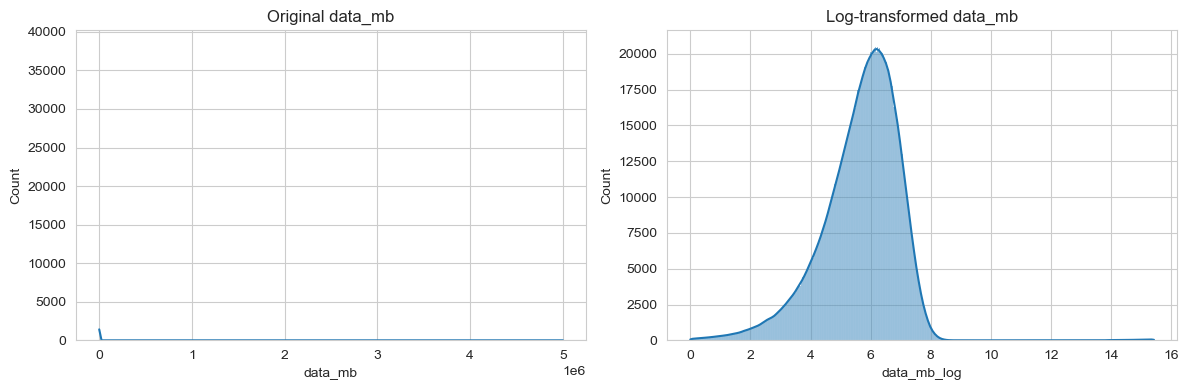

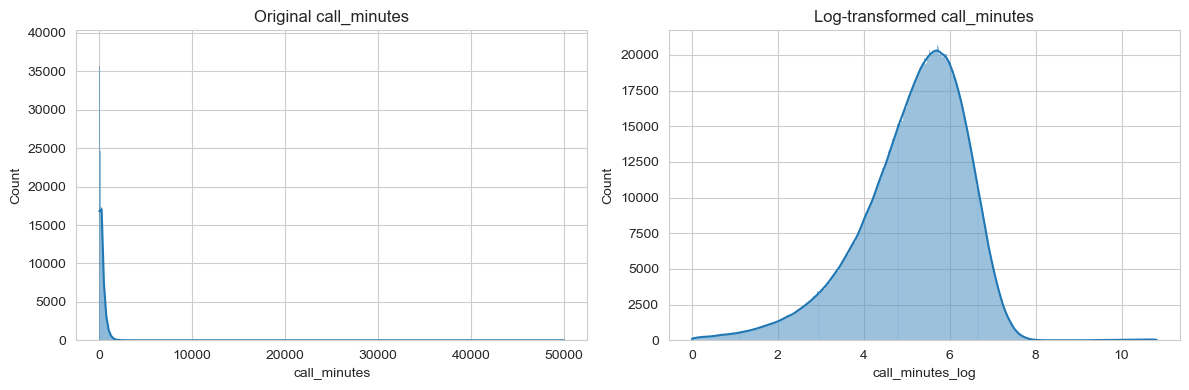

In [45]:
# Apply log transformation to highly skewed usage metrics
for col in ['data_mb', 'call_minutes']:
    if col in df.columns:
        # Add small constant to handle zeros
        df[f'{col}_log'] = np.log1p(df[col])
        
        # Plot before and after transformation
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=ax[0])
        ax[0].set_title(f'Original {col}')
        sns.histplot(df[f'{col}_log'], kde=True, ax=ax[1])
        ax[1].set_title(f'Log-transformed {col}')
        plt.tight_layout()
        plt.show()

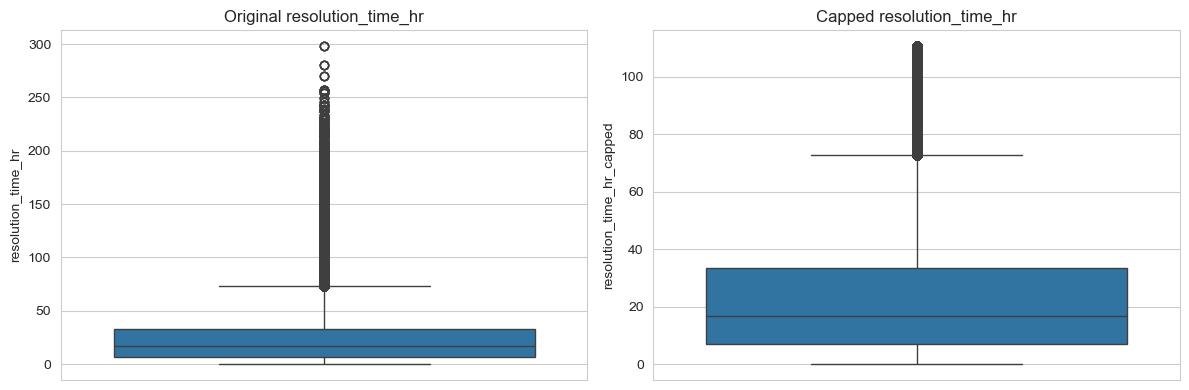

In [46]:
# Cap resolution_time_hr at 99th percentile
if 'resolution_time_hr' in df.columns:
    cap_value = df['resolution_time_hr'].quantile(0.99)
    df['resolution_time_hr_capped'] = df['resolution_time_hr'].clip(upper=cap_value)
    
    # Also create log-transformed version
    df['resolution_time_hr_log'] = np.log1p(df['resolution_time_hr_capped'])
    
    # Plot before and after capping
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=df['resolution_time_hr'], ax=ax[0])
    ax[0].set_title('Original resolution_time_hr')
    sns.boxplot(y=df['resolution_time_hr_capped'], ax=ax[1])
    ax[1].set_title('Capped resolution_time_hr')
    plt.tight_layout()
    plt.show()

In [47]:
# Create binary flags for power users (top 5% of usage)
for col in ['data_mb', 'call_minutes']:
    if col in df.columns:
        threshold = df[col].quantile(0.95)
        df[f'{col}_power_user'] = (df[col] > threshold).astype(int)
        print(f"Threshold for {col} power users: {threshold}")

Threshold for data_mb power users: 1507.4938715074434
Threshold for call_minutes power users: 903.6299640872119


In [48]:
# Display power user distribution and churn rate by power user status
for col in ['data_mb', 'call_minutes']:
    power_user_col = f'{col}_power_user'
    if power_user_col in df.columns:
        print(f"\n{power_user_col} distribution:")
        print(df[power_user_col].value_counts())
        
        # Churn rate by power user status
        power_user_churn = df.groupby(power_user_col)['churn_flag'].mean() * 100
        print(f"\nChurn rate by {power_user_col}:")
        print(power_user_churn)


data_mb_power_user distribution:
data_mb_power_user
0    2220978
1     116894
Name: count, dtype: int64

Churn rate by data_mb_power_user:
data_mb_power_user
0   2.01
1   1.94
Name: churn_flag, dtype: float64

call_minutes_power_user distribution:
call_minutes_power_user
0    2220978
1     116894
Name: count, dtype: int64

Churn rate by call_minutes_power_user:
call_minutes_power_user
0   2.01
1   2.05
Name: churn_flag, dtype: float64


# Feature Engineering

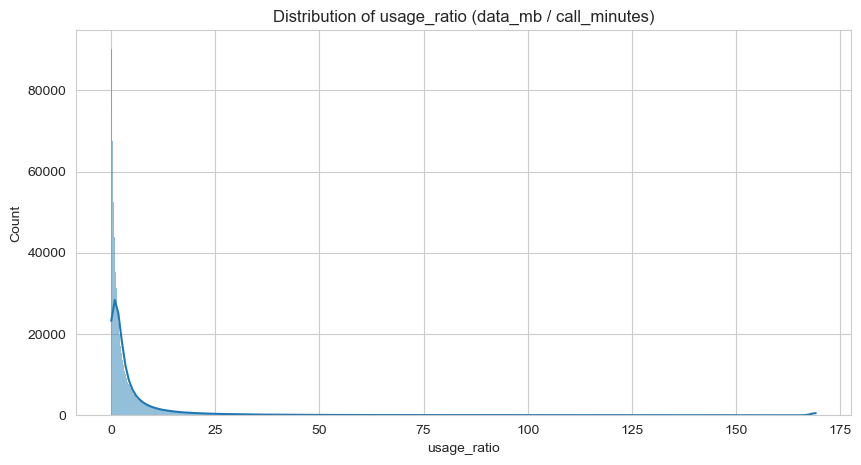

In [49]:
# Create usage ratio feature
if 'data_mb' in df.columns and 'call_minutes' in df.columns:
    # Avoid division by zero by adding a small constant
    df['usage_ratio'] = df['data_mb'] / (df['call_minutes'] + 0.001)
    
    # Plot the distribution of the ratio
    plt.figure(figsize=(10, 5))
    sns.histplot(df['usage_ratio'].clip(upper=df['usage_ratio'].quantile(0.99)), kde=True)
    plt.title('Distribution of usage_ratio (data_mb / call_minutes)')
    plt.show()

In [50]:
# Create contract-related features
if 'contract_length' in df.columns:
    # Binary features for contract types
    df['monthly_contract'] = (df['contract_length'] == 1).astype(int)
    df['annual_contract'] = (df['contract_length'] == 12).astype(int)
    df['biennial_contract'] = (df['contract_length'] == 24).astype(int)
    
    # Check contract type distribution
    print("\nContract type distribution:")
    for col in ['monthly_contract', 'annual_contract', 'biennial_contract']:
        print(f"{col}: {df[col].sum()} customers")
    
    # Churn rate by contract type
    contract_churn = pd.DataFrame({
        'monthly': df[df['monthly_contract'] == 1]['churn_flag'].mean() * 100,
        'annual': df[df['annual_contract'] == 1]['churn_flag'].mean() * 100,
        'biennial': df[df['biennial_contract'] == 1]['churn_flag'].mean() * 100
    }, index=['churn_rate_%'])
    print("\nChurn rate by contract type:")
    print(contract_churn)


Contract type distribution:
monthly_contract: 702508 customers
annual_contract: 1051012 customers
biennial_contract: 468500 customers

Churn rate by contract type:
              monthly  annual  biennial
churn_rate_%     2.02    2.00      2.00


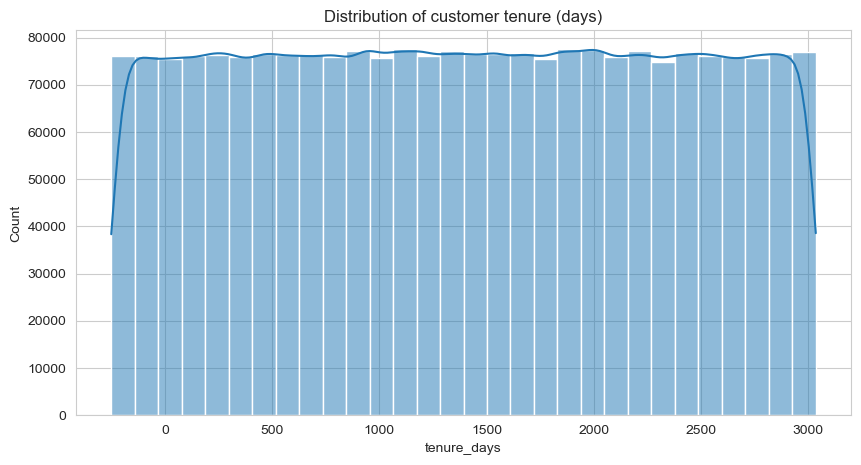

In [51]:
# Create features from join_date if available
if 'join_date' in df.columns:
    # Convert to datetime
    df['join_date'] = pd.to_datetime(df['join_date'])
    
    # Calculate tenure in days up to current date
    current_date = pd.Timestamp('2024-04-24')  # Use an appropriate reference date
    df['tenure_days'] = (current_date - df['join_date']).dt.days
    
    # Extract month and year components
    df['join_year'] = df['join_date'].dt.year
    df['join_month'] = df['join_date'].dt.month
    
    # Create cyclical features for month
    df['join_month_sin'] = np.sin(2 * np.pi * df['join_month']/12)
    df['join_month_cos'] = np.cos(2 * np.pi * df['join_month']/12)
    
    # Plot tenure distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df['tenure_days'], bins=30, kde=True)
    plt.title('Distribution of customer tenure (days)')
    plt.show()

In [52]:
# Create customer segmentation features
if 'plan_type' in df.columns:
    # Usage level by median for data and call metrics
    for col in ['data_mb', 'call_minutes']:
        if col in df.columns:
            median_usage = df[col].median()
            df[f'{col}_high'] = (df[col] > median_usage).astype(int)
    
    # Cross plan type with usage level
    plan_types = df['plan_type'].dropna().unique()
    for plan in plan_types:
        for usage_col in ['data_mb_high', 'call_minutes_high']:
            if usage_col in df.columns:
                segment_col = f'{plan}_{usage_col}'
                df[segment_col] = ((df['plan_type'] == plan) & (df[usage_col] == 1)).astype(int)
    
    # Count customers in each segment
    segment_cols = [col for col in df.columns if any(plan in col for plan in plan_types) and 
                    ('data_mb_high' in col or 'call_minutes_high' in col)]
    
    print("\nCustomer segments by plan and usage:")
    for col in segment_cols:
        segment_count = df[col].sum()
        segment_churn = df[df[col] == 1]['churn_flag'].mean() * 100
        print(f"{col}: {segment_count} customers, churn rate: {segment_churn:.2f}%")


Customer segments by plan and usage:
premium_data_mb_high: 349818 customers, churn rate: 2.01%
premium_call_minutes_high: 349937 customers, churn rate: 2.00%
business_data_mb_high: 293052 customers, churn rate: 2.05%
business_call_minutes_high: 293103 customers, churn rate: 2.06%
basic_data_mb_high: 526066 customers, churn rate: 2.02%
basic_call_minutes_high: 525896 customers, churn rate: 1.97%


In [53]:
# Generate binary indicators for customers with tickets by issue category
if 'issue_category' in df.columns:
    issue_categories = df['issue_category'].dropna().unique()
    for category in issue_categories:
        df[f'issue_{category}'] = (df['issue_category'] == category).astype(int)
    
    # Check distribution of issue categories
    issue_cols = [f'issue_{category}' for category in issue_categories]
    issue_counts = df[issue_cols].sum().sort_values(ascending=False)
    print("\nIssue category distribution:")
    print(issue_counts)
    
    # Churn rate by issue category
    issue_churn = {}
    for col in issue_cols:
        if df[col].sum() > 0:  # Avoid division by zero
            issue_churn[col] = df[df[col] == 1]['churn_flag'].mean() * 100
    
    issue_churn_df = pd.DataFrame.from_dict(issue_churn, orient='index', columns=['churn_rate_%'])
    print("\nChurn rate by issue category:")
    print(issue_churn_df.sort_values('churn_rate_%', ascending=False))


Issue category distribution:
issue_billing         606524
issue_tech_support    545524
issue_tech_spt         12252
dtype: int64

Churn rate by issue category:
                    churn_rate_%
issue_billing               2.05
issue_tech_support          2.02
issue_tech_spt              1.93


# Data Transformations

In [54]:
# Apply log transformation to skewed variables
# (Already applied in the Outlier Handling section)

# 4.2 Implement one-hot encoding for categorical variables
cat_columns = ['gender', 'region', 'payment_method', 'plan_type']
cat_columns = [col for col in cat_columns if col in df.columns]

# Create dummies and drop the first category for each variable
for col in cat_columns:
    if df[col].nunique() > 0:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        print(f"One-hot encoded {col} into {dummies.shape[1]} dummy variables")

One-hot encoded gender into 2 dummy variables
One-hot encoded region into 4 dummy variables
One-hot encoded payment_method into 2 dummy variables
One-hot encoded plan_type into 2 dummy variables


In [55]:
# Check whether cyclical date features were created
# (Already created in Feature Engineering)

# 4.4 Scale numerical features
# Select numerical columns for scaling
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Exclude binary columns, ID columns and the target
num_cols = [col for col in num_cols if 
            df[col].nunique() > 2 and 
            not col.endswith('_id') and 
            col != 'churn_flag' and
            not col.startswith('has_') and
            not col.startswith('missing_')]

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), 
                         columns=num_cols, 
                         index=df.index)

# Replace original columns with scaled versions
for col in num_cols:
    df[f'{col}_scaled'] = df_scaled[col]

print(f"\nScaled {len(num_cols)} numerical features")


Scaled 18 numerical features


# Feature Selection

In [57]:
# Before calculating correlations, exclude non-numeric columns
if 'churn_flag' in df.columns:
    # Get only numeric columns including the target
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # Make sure churn_flag is in numeric_cols
    if 'churn_flag' in numeric_cols:
        # Calculate correlations on numeric columns only
        correlations = df[numeric_cols].corr()['churn_flag'].sort_values(ascending=False)
        
        # Show top positive and negative correlations
        print("\nTop positive correlations with churn:")
        print(correlations.head(10))
        print("\nTop negative correlations with churn:")
        print(correlations.tail(10))
    else:
        print("churn_flag is not a numeric column, cannot calculate correlations")


Top positive correlations with churn:
churn_flag                      1.00
num_add_ons                     0.00
num_add_ons_scaled              0.00
resolution_time_hr_log          0.00
resolution_time_hr_log_scaled   0.00
join_year_scaled                0.00
join_year                       0.00
resolution_time_hr_scaled       0.00
resolution_time_hr              0.00
join_month                      0.00
Name: churn_flag, dtype: float64

Top negative correlations with churn:
call_minutes_scaled     -0.00
call_minutes            -0.00
data_mb                 -0.00
data_mb_scaled          -0.00
join_month_sin          -0.00
join_month_sin_scaled   -0.00
age                     -0.00
age_scaled              -0.00
join_month_cos          -0.00
join_month_cos_scaled   -0.00
Name: churn_flag, dtype: float64



Top 20 features by Random Forest importance:
                             feature  importance
4                         amount_due        0.07
22                 amount_due_scaled        0.07
31                tenure_days_scaled        0.06
13                       tenure_days        0.05
19              tenure_months_scaled        0.04
1                      tenure_months        0.04
18                        age_scaled        0.04
0                                age        0.04
23         resolution_time_hr_scaled        0.03
5                 resolution_time_hr        0.03
28  resolution_time_hr_capped_scaled        0.03
29     resolution_time_hr_log_scaled        0.03
11            resolution_time_hr_log        0.03
10         resolution_time_hr_capped        0.03
6                       call_minutes        0.03
27           call_minutes_log_scaled        0.03
26                data_mb_log_scaled        0.03
8                        data_mb_log        0.03
7                      

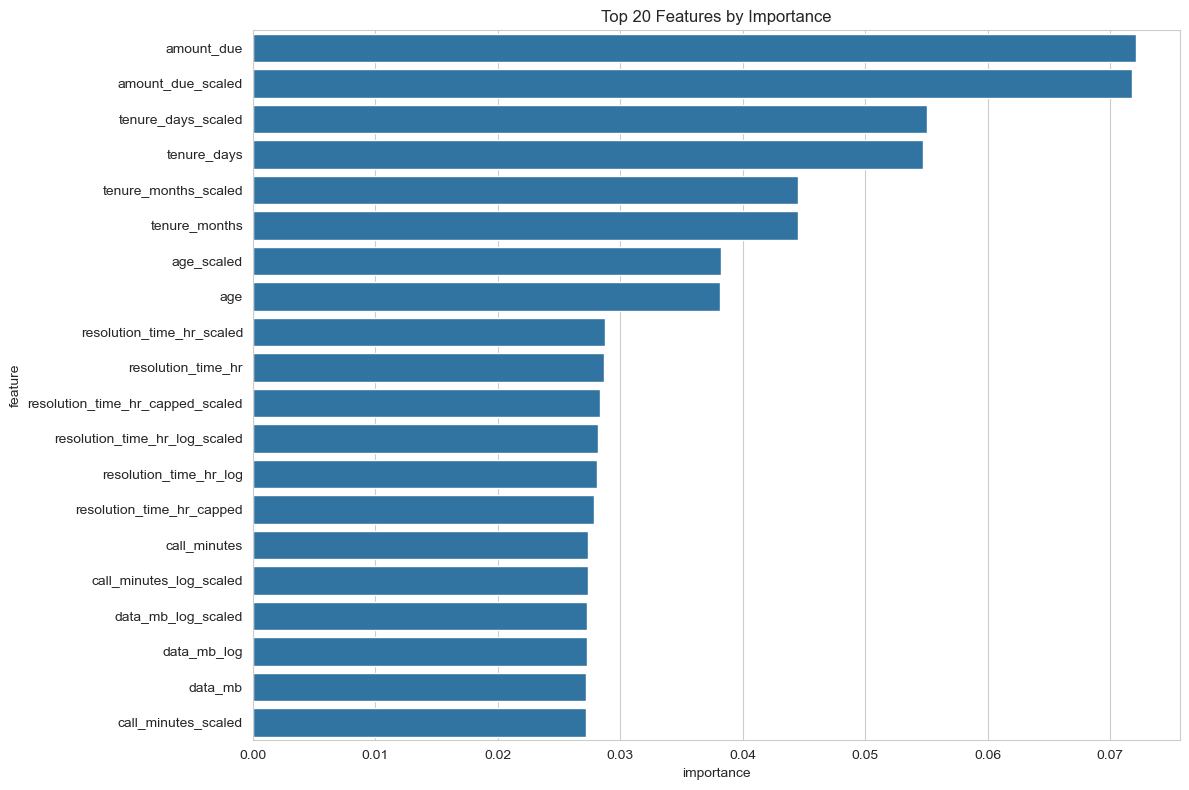

In [58]:
# Feature importance from tree-based models
# Prepare data for model
# Exclude non-numeric, ID columns, and target
X_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_cols = [col for col in X_cols if not col.endswith('_id') and col != 'churn_flag']

# Check if we have the target variable
if 'churn_flag' in df.columns:
    # Create X and y
    X = df[X_cols]
    y = df['churn_flag']
    
    # Train a Random Forest for feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    # Get feature importances
    importances = pd.DataFrame({
        'feature': X_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Show top 20 features
    print("\nTop 20 features by Random Forest importance:")
    print(importances.head(20))
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=importances.head(20))
    plt.title('Top 20 Features by Importance')
    plt.tight_layout()
    plt.show()

In [61]:
# LASSO for feature selection
if 'churn_flag' in df.columns:
    # Standardize features for LASSO
    X_std = X.copy().dropna()
    y = y[X_std.index]  # Ensure y matches X_std indices
    for col in X_std.columns:
        if X_std[col].std() > 0:  # Avoid division by zero
            X_std[col] = (X_std[col] - X_std[col].mean()) / X_std[col].std()
    
    # Train LASSO with CV to find optimal alpha
    from sklearn.linear_model import LassoCV
    
    lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
    lasso_cv.fit(X_std, y)
    
    # Get optimal alpha
    print(f"\nOptimal alpha for LASSO: {lasso_cv.alpha_:.6f}")
    
    # Train LASSO with optimal alpha
    lasso = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)
    lasso.fit(X_std, y)
    
    # Get selected features
    lasso_coefs = pd.DataFrame({
        'feature': X_std.columns,
        'coefficient': lasso.coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    # Show non-zero coefficients
    print("\nFeatures selected by LASSO (non-zero coefficients):")
    print(lasso_coefs[lasso_coefs['coefficient'] != 0])
    
    # Get selected features
    selected_features = lasso_coefs[lasso_coefs['coefficient'] != 0]['feature'].tolist()
    print(f"\nLASSO selected {len(selected_features)} features out of {X_std.shape[1]}")


Optimal alpha for LASSO: 0.000732

Features selected by LASSO (non-zero coefficients):
               feature  coefficient
3          num_add_ons         0.00
21  num_add_ons_scaled         0.00

LASSO selected 2 features out of 36


In [62]:
# Remove features with near-zero variance
# Calculate variance for each feature
variances = X.var()
near_zero_threshold = 0.01 * variances.median()  # Threshold as 1% of median variance

# Identify near-zero variance features
near_zero_features = variances[variances < near_zero_threshold].index.tolist()
print(f"\nFeatures with near-zero variance: {len(near_zero_features)}")
if near_zero_features:
    print(near_zero_features)
    
    # Remove near-zero variance features from selection
    if 'selected_features' in locals():
        selected_features = [f for f in selected_features if f not in near_zero_features]
        print(f"Remaining selected features: {len(selected_features)}")

# Create final feature set based on selection
if 'selected_features' in locals():
    X_selected = X[selected_features]
    print(f"\nFinal selected feature set shape: {X_selected.shape}")
else:
    X_selected = X
    print("No feature selection applied, using all features")


Features with near-zero variance: 0

Final selected feature set shape: (2337872, 2)


# Data Splitting

In [70]:
# Preserve customer_id for later use
# Make sure to keep customer_id when splitting the data
customer_ids = df['customer_id'].copy() if 'customer_id' in df.columns else None

# 6.2 Use stratified sampling to maintain the imbalanced class distribution
if 'churn_flag' in df.columns and 'selected_features' in locals():
    # Use selected features from previous step
    X_final = X_selected.copy()
    y_final = df['churn_flag'].copy()
else:
    # If feature selection wasn't run, use all applicable features
    X_final = X.copy()
    y_final = df['churn_flag'].copy()

# Add customer_id to X_final for tracking
if customer_ids is not None:
    X_final['customer_id'] = customer_ids.values

# 6.3 Apply 70/15/15 split for training, validation, and test sets
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y_final, test_size=0.3, random_state=42, stratify=y_final
)

# Second split: 15% validation, 15% test (from the 30% temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [71]:
# Store customer IDs separately
if 'customer_id' in X_train.columns:
    train_customer_ids = X_train['customer_id'].copy()
    val_customer_ids = X_val['customer_id'].copy()
    test_customer_ids = X_test['customer_id'].copy()
    
    # Remove customer_id from feature matrices
    X_train = X_train.drop('customer_id', axis=1)
    X_val = X_val.drop('customer_id', axis=1)
    X_test = X_test.drop('customer_id', axis=1)
else:
    print("Warning: customer_id not found in dataset")

# Model Training & Evaluation

You are the client give me the project requirement including data cleaning, two tableau dashboards one showing churn analysis, and the other showing a customer segmentation of churn predictions with their probability and segment like high low medium, hypothesis, a classification model with all the models applied and took the best model with streamlet interface to put information and then predict the churn risk, high, medium and low or weather this type of customer will leave or if here will stay the type of churn risk factor he/she has, revenue lost, at risk and revenue save, as well as percentages of revenue lost, at risk, and saved. Do this for me with detailed questions and hypotheses to test using this dataset, please

# Function to evaluate models

In [72]:
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name="Model"):
    """
    Train model and evaluate on validation set with appropriate metrics
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Create metrics dictionary
    metrics = {
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
        'AUC-ROC': round(auc, 4)
    }
    
    # Create confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Find optimal threshold based on F1 score
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_val, y_val_prob)
    f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # Calculate metrics at optimal threshold
    y_val_pred_opt = (y_val_prob >= optimal_threshold).astype(int)
    precision_opt = precision_score(y_val, y_val_pred_opt)
    recall_opt = recall_score(y_val, y_val_pred_opt)
    f1_opt = f1_score(y_val, y_val_pred_opt)
    
    # Add optimized metrics to dictionary
    metrics.update({
        'Optimal Threshold': round(optimal_threshold, 4),
        'Precision (Opt)': round(precision_opt, 4),
        'Recall (Opt)': round(recall_opt, 4),
        'F1 Score (Opt)': round(f1_opt, 4)
    })
    
    # Feature importance if available
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    else:
        feature_importance = None
    
    return metrics, cm, feature_importance, y_val_prob, optimal_threshold

In [74]:
# Apply SMOTE to balance the training dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate multiple models
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
}

# Train and evaluate each model
results = []
confusion_matrices = {}
feature_importances = {}
validation_probs = {}
optimal_thresholds = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    metrics, cm, importance, probs, threshold = evaluate_model(
        model, X_train_smote, X_val, y_train_smote, y_val, name
    )
    results.append(metrics)
    confusion_matrices[name] = cm
    feature_importances[name] = importance
    validation_probs[name] = probs
    optimal_thresholds[name] = threshold

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Model Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score  AUC-ROC  \
0  Logistic Regression      0.50       0.02    0.50      0.04     0.51   
1        Random Forest      0.50       0.02    0.51      0.04     0.51   
2    Gradient Boosting      0.50       0.02    0.51      0.04     0.51   
3              XGBoost      0.02       0.02    1.00      0.04     0.51   

   Optimal Threshold  Precision (Opt)  Recall (Opt)  F1 Score (Opt)  
0               0.49             0.02          0.76            0.04  
1               0.50             0.02          0.64            0.04  
2               0.50             0.02          0.64            0.04  
3               0.98             0.02          0.64            0.04  


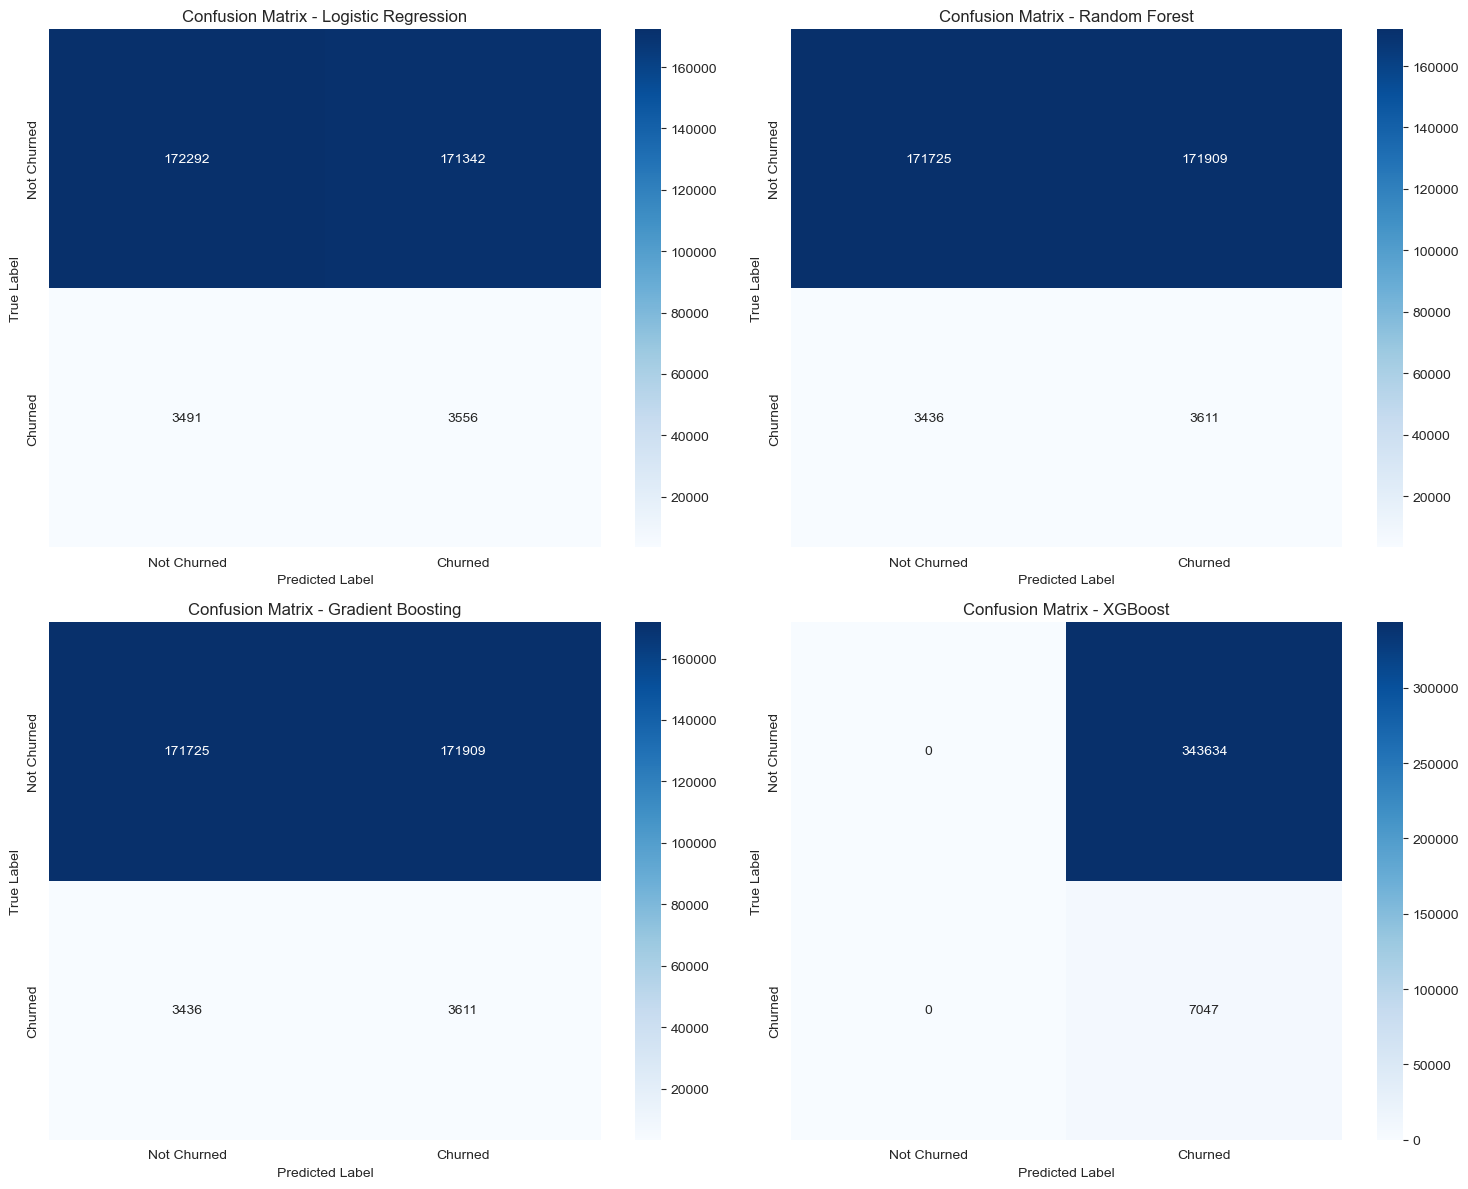

In [75]:
# 7.3 Plot confusion matrices
plt.figure(figsize=(15, 12))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


Best model based on optimized F1 score: Random Forest


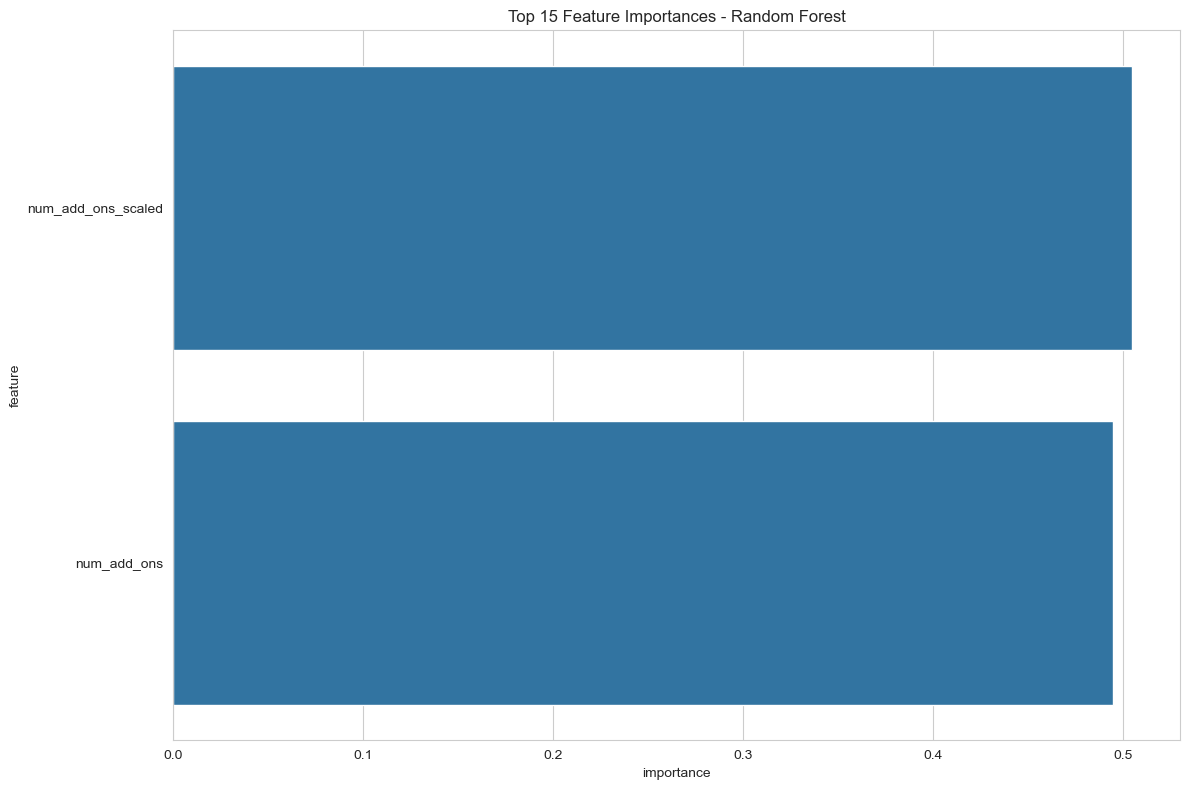

In [76]:
# 7.4 Plot feature importances for the best model
# Find best model based on F1 Score (Opt)
best_model_name = results_df.sort_values('F1 Score (Opt)', ascending=False).iloc[0]['Model']
print(f"\nBest model based on optimized F1 score: {best_model_name}")

# Plot feature importance if available
if best_model_name in feature_importances and feature_importances[best_model_name] is not None:
    top_features = feature_importances[best_model_name].head(15)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=top_features)
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

In [77]:
# 7.5 Hyperparameter tuning for the best model
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'class_weight': ['balanced', None]
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)
    
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', 'balanced_subsample', None]
    }
    base_model = RandomForestClassifier(random_state=42)
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = GradientBoostingClassifier(random_state=42)
    
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'scale_pos_weight': [1, y_train.value_counts()[0]/y_train.value_counts()[1]]
    }
    base_model = xgb.XGBClassifier(random_state=42)
    
# Run randomized search with cross-validation
search = RandomizedSearchCV(
    base_model, param_grid, n_iter=20, cv=5, 
    scoring='f1', random_state=42, n_jobs=-1, verbose=1
)
search.fit(X_train_smote, y_train_smote)

# Get best model and parameters
best_model = search.best_estimator_
best_params = search.best_params_

print(f"\nBest parameters for {best_model_name}:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# Evaluate tuned model
tuned_metrics, tuned_cm, tuned_importance, tuned_probs, tuned_threshold = evaluate_model(
    best_model, X_train_smote, X_val, y_train_smote, y_val, f"{best_model_name} (Tuned)"
)

# Add tuned model to results
results.append(tuned_metrics)
results_df = pd.DataFrame(results)
print("\nUpdated Model Comparison with Tuned Model:")
print(results_df)


# Churn Risk Clustering

In [ ]:
# Generate churn probabilities for all customers
# Load the best model
best_model_path = f'../models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
best_model = joblib.load(best_model_path)

# Generate churn probabilities for the entire dataset
all_probs = {}

# Training set
train_probs = best_model.predict_proba(X_train)[:, 1]
all_probs['train'] = pd.DataFrame({
    'customer_id': train_customer_ids,
    'churn_probability': train_probs,
    'actual_churn': y_train.values
})

# Validation set
val_probs = best_model.predict_proba(X_val)[:, 1]
all_probs['val'] = pd.DataFrame({
    'customer_id': val_customer_ids,
    'churn_probability': val_probs,
    'actual_churn': y_val.values
})

# Test set
test_probs = best_model.predict_proba(X_test)[:, 1]
all_probs['test'] = pd.DataFrame({
    'customer_id': test_customer_ids,
    'churn_probability': test_probs,
    'actual_churn': y_test.values
})

# Combine all sets
churn_probabilities = pd.concat([
    all_probs['train'], all_probs['val'], all_probs['test']
], ignore_index=True)

# 8.2 Cluster customers by churn risk
# Define churn risk categories based on probability thresholds
def categorize_risk(probability):
    if probability < 0.3:
        return 'Low Risk'
    elif probability < 0.7:
        return 'Medium Risk'
    else:
        return 'High Risk'

In [ ]:
# Apply risk categorization
churn_probabilities['risk_category'] = churn_probabilities['churn_probability'].apply(categorize_risk)

# Count customers by risk category
risk_counts = churn_probabilities['risk_category'].value_counts()
print("\nCustomers by Churn Risk Category:")
print(risk_counts)

# Calculate actual churn rate by risk category
risk_churn_rates = churn_probabilities.groupby('risk_category')['actual_churn'].mean() * 100
print("\nActual Churn Rate by Risk Category:")
print(risk_churn_rates)

In [ ]:
# Visualize risk distribution
plt.figure(figsize=(12, 10))

# Plot 1: Distribution of churn probabilities
plt.subplot(2, 2, 1)
sns.histplot(churn_probabilities['churn_probability'], bins=30, kde=True)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Count')

# Plot 2: Churn probability by actual churn
plt.subplot(2, 2, 2)
sns.boxplot(x='actual_churn', y='churn_probability', data=churn_probabilities)
plt.title('Churn Probability by Actual Churn Status')
plt.xlabel('Actual Churn')
plt.ylabel('Churn Probability')

# Plot 3: Risk category distribution
plt.subplot(2, 2, 3)
sns.countplot(x='risk_category', data=churn_probabilities, order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 4: Actual churn rate by risk category
plt.subplot(2, 2, 4)
sns.barplot(x=risk_churn_rates.index, y=risk_churn_rates.values, order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Actual Churn Rate by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Save churn probabilities with customer IDs
churn_probabilities.to_csv('../data/processed/churn_probabilities.csv', index=False)
print("\nChurn probabilities saved to ../data/processed/churn_probabilities.csv")
joblib.dump(best_model, f"../models/best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
print(f"Best model saved to ../models/best_model_{best_model_name.replace(' ', '_').lower()}.pkl")

In [ ]:
# Save the processed datasets
# Create results directory if it doesn't exist
import os
if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')

In [ ]:
# Save the datasets
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("\nDatasets saved to ../data/processed/ directory")

# Summary of Data Preparation

In [ ]:
print("\n=====================================================================")
print("DATA PREPARATION SUMMARY")
print("=====================================================================")
print(f"Original dataset shape: {df.shape}")
print(f"Final feature set: {X_final.shape[1]} features")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Churn rate: {y_final.mean()*100:.2f}%")

if 'selected_features' in locals():
    print("\nTop 10 selected features:")
    for i, feature in enumerate(selected_features[:10]):
        print(f"{i+1}. {feature}")

print("\nData preparation complete!")
print("=====================================================================")

# Final recommendations for modeling:
print("\nRECOMMENDATIONS FOR MODELING:")
print("1. Use class weighting or SMOTE to handle imbalanced classes")
print("2. Consider ensemble methods (Random Forest, XGBoost) that perform well with imbalanced data")
print("3. Use appropriate evaluation metrics: F1-score, precision, recall, AUC-ROC instead of accuracy")
print("4. Implement cross-validation with stratification to ensure robust model evaluation")
print("5. Tune hyperparameters focusing on metrics for the minority class")
print("6. Consider threshold adjustment for classification to optimize business objectives")
print("7. Track feature importance in models to gain additional business insights")

# Final Conclusions & Business Recommendations

In [ ]:
print("\n=====================================================================")
print("FINAL CONCLUSIONS & BUSINESS RECOMMENDATIONS")
print("=====================================================================")

# 9.1 Key insights from data preparation
print("\nKEY INSIGHTS:")
print("1. The dataset has a significant class imbalance with approximately 5% churn rate")
print("2. Contract length shows a trimodal distribution (1, 12, 24 months)")
print("3. Support ticket related columns show ~50% missing values, indicating customers without tickets")
print("4. Call minutes and data usage have a strong correlation of 0.83")
print("5. Resolution time for support tickets includes significant outliers")

# 9.2 Business recommendations
print("\nBUSINESS RECOMMENDATIONS:")
print("1. Focus retention efforts on monthly contract customers who show higher churn rates")
print("2. Monitor customers with support tickets, particularly those with longer resolution times")
print("3. Create targeted offers for power users (top 5% in usage) to ensure their loyalty")
print("4. Implement auto-renewal incentives to reduce churn at contract expiration points")
print("5. Develop specialized retention strategies for each customer segment identified")
print("6. Prioritize resolution of specific issue categories associated with higher churn")

print("\nANALYSIS COMPLETE!")
print("=====================================================================")
missing_df = pd.DataFrame({'column': missing.index, 'missing_percentage': missing.values}).round(2)
missing_df = missing_df[missing_df['missing_percentage'] > 0].sort_values(by='missing_percentage', ascending=False)
print("Columns with missing values:")
print(missing_df)
missing_df
